<a href="https://colab.research.google.com/github/kashmanovav-lab/ML_labs/blob/main/Lab_1_Kashmanova_3375.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Задание 1. Исследование набора данных
# Датасет: Wheat Seeds (UCI Machine Learning Repository)

# 2. Краткое описание датасета

"""
Предметная область: Агрономия, биометрия
Источник: UCI Machine Learning Repository — https://archive.ics.uci.edu/ml/datasets/seeds
Характер данных: Реальные измерения геометрических характеристик семян пшеницы
Задача анализа: Классификация семян по трём сортам пшеницы (классы 1, 2, 3)

Атрибуты (все числовые, непрерывные):
1. area — площадь семени
2. perimeter — периметр семени
3. compactness — компактность = 4π·area / perimeter²
4. length_of_kernel — длина ядра
5. width_of_kernel — ширина ядра
6. asymmetry_coefficient — коэффициент асимметрии
7. length_of_groove — длина бороздки
8. class — класс (1, 2 или 3 — сорт пшеницы)
"""

'\nПредметная область: Агрономия, биометрия\nИсточник: UCI Machine Learning Repository — https://archive.ics.uci.edu/ml/datasets/seeds\nХарактер данных: Реальные измерения геометрических характеристик семян пшеницы\nЗадача анализа: Классификация семян по трём сортам пшеницы (классы 1, 2, 3)\n\nАтрибуты (все числовые, непрерывные):\n1. area — площадь семени\n2. perimeter — периметр семени\n3. compactness — компактность = 4π·area / perimeter²\n4. length_of_kernel — длина ядра\n5. width_of_kernel — ширина ядра\n6. asymmetry_coefficient — коэффициент асимметрии\n7. length_of_groove — длина бороздки\n8. class — класс (1, 2 или 3 — сорт пшеницы)\n'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = [
    'area',
    'perimeter',
    'compactness',
    'length_of_kernel',
    'width_of_kernel',
    'asymmetry_coefficient',
    'length_of_groove',
    'class'
]

# Данные разделены пробелами (в т.ч. множественными)
table = pd.read_csv(url, sep=r'\s+', names=columns, header=None)

# Просмотр первых строк
table.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
# Среднее значение и СКО для каждого числового признака
table.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
# Проверка на пропуски
missing = table.isna().sum()
print("Пропущенные значения:")
print(missing)

# Вывод: пропусков нет → обработка не требуется

Пропущенные значения:
area                     0
perimeter                0
compactness              0
length_of_kernel         0
width_of_kernel          0
asymmetry_coefficient    0
length_of_groove         0
class                    0
dtype: int64


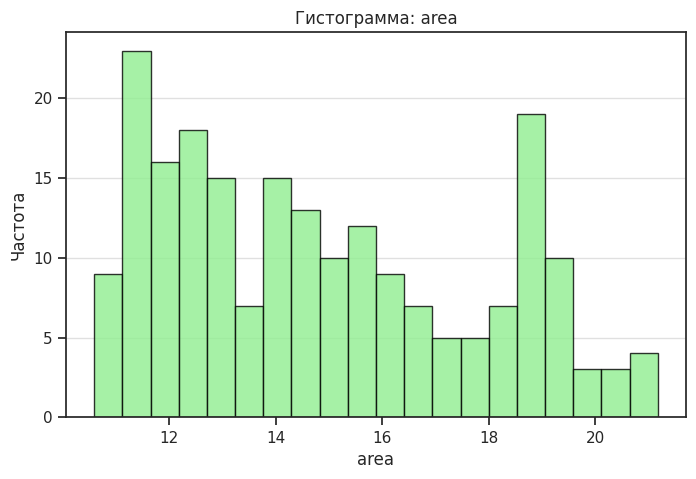

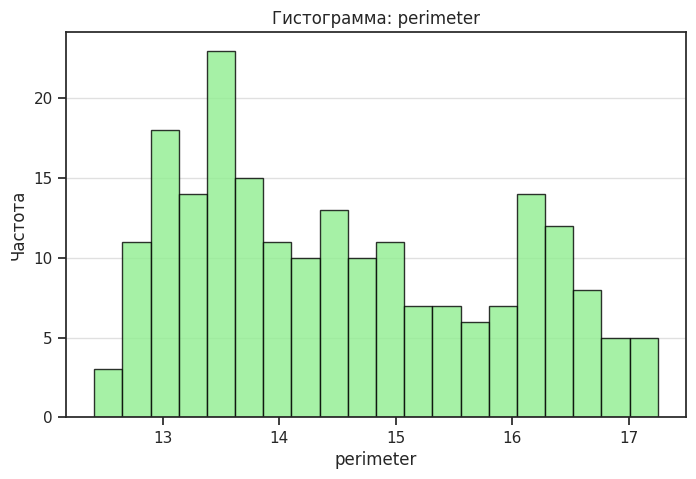

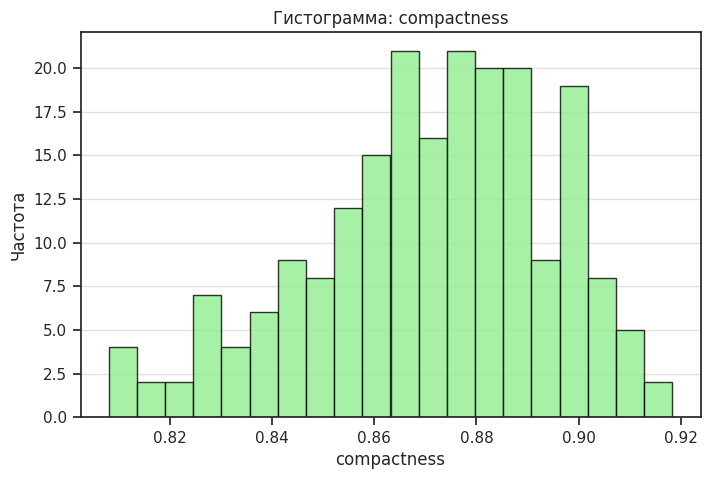

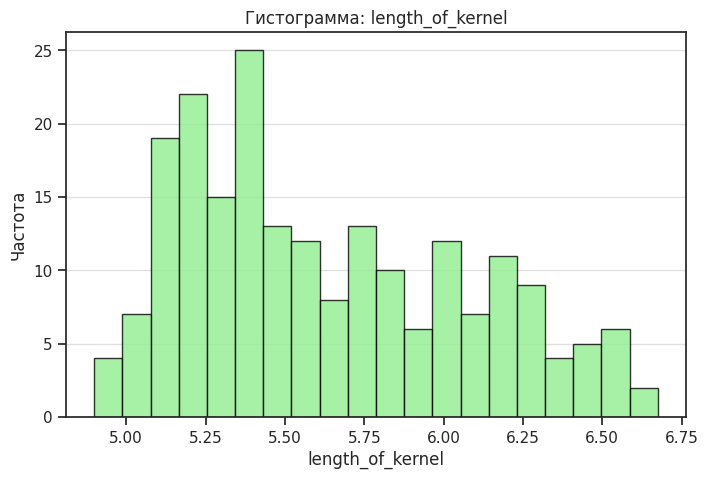

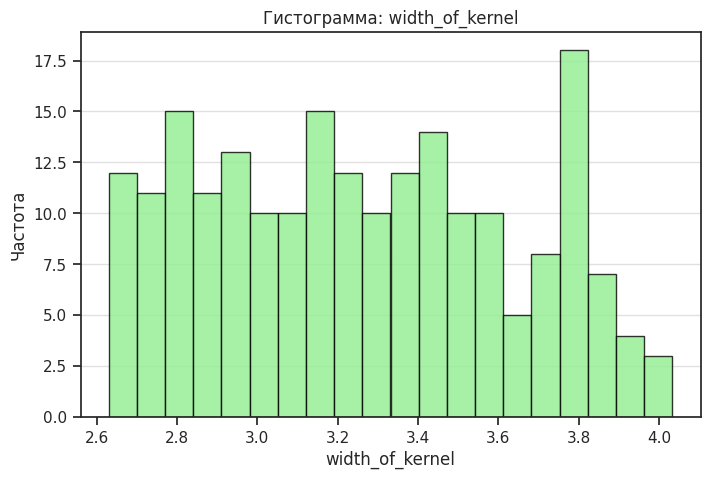

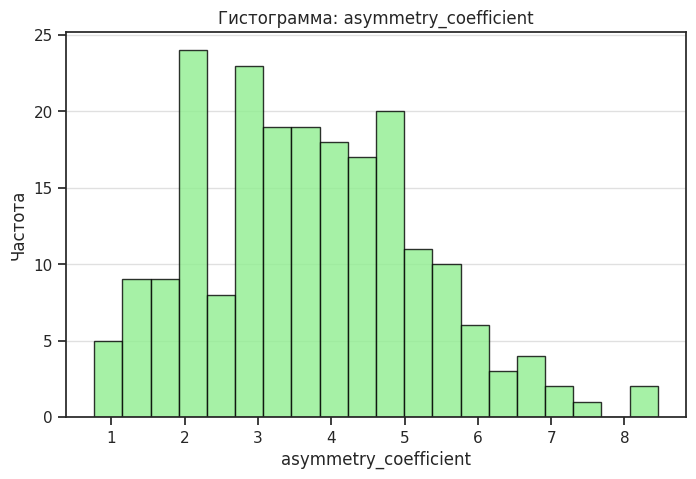

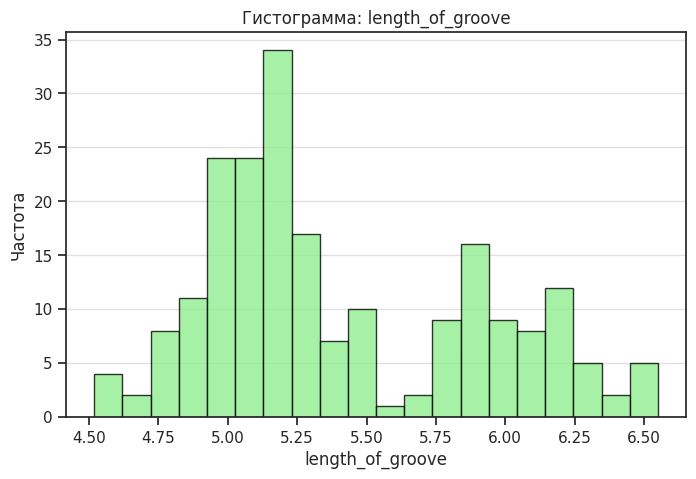

In [7]:
# Числовые признаки (без 'class')
numerical_features = [col for col in table.columns if col != 'class']

# Построение гистограмм
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(table[feature], bins=20, color='lightgreen', edgecolor='black', alpha=0.8)
    plt.title(f'Гистограмма: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.grid(axis='y', alpha=0.6)
    plt.show()

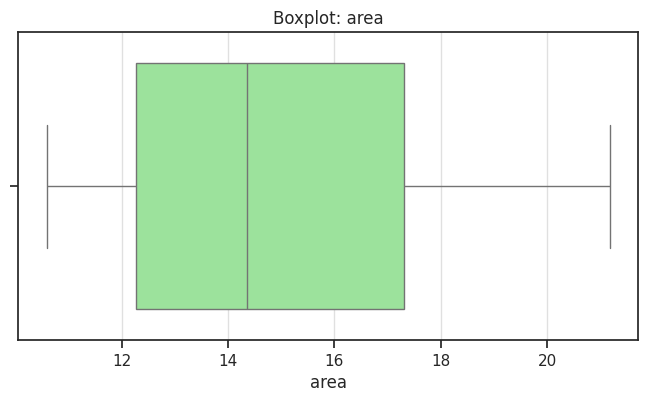

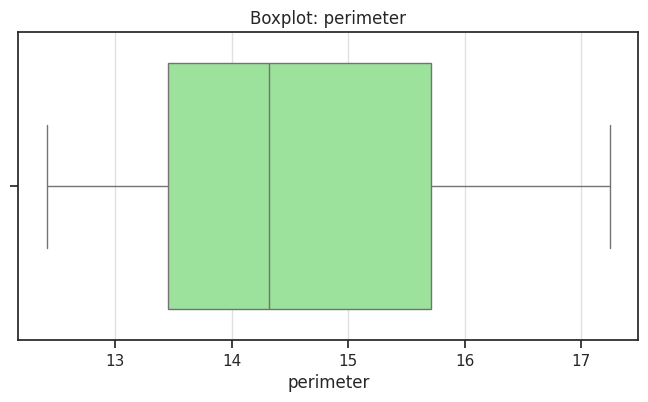

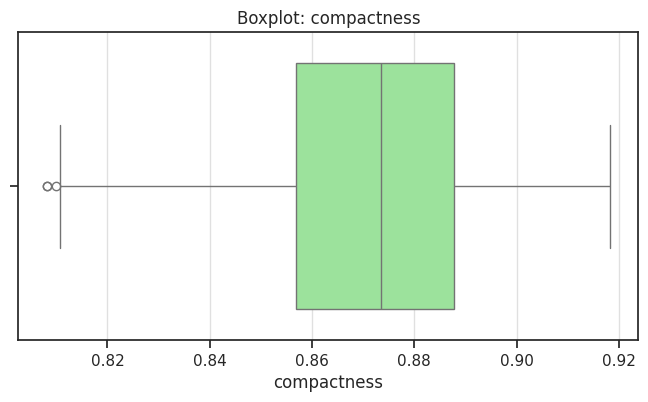

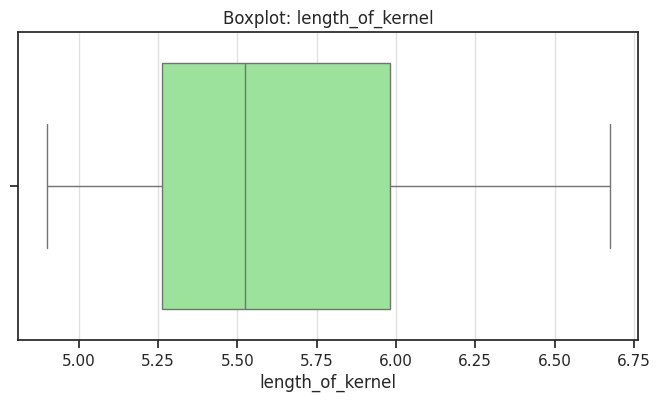

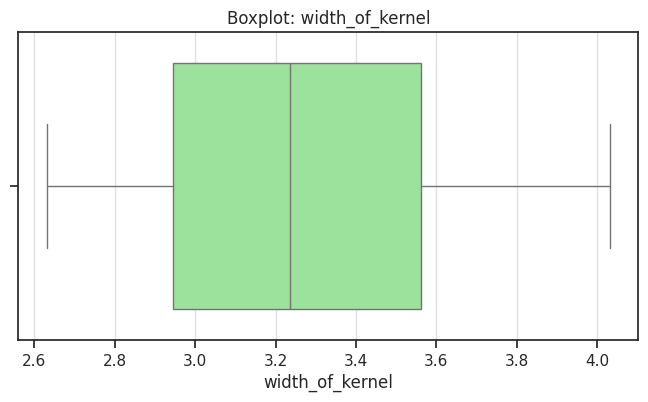

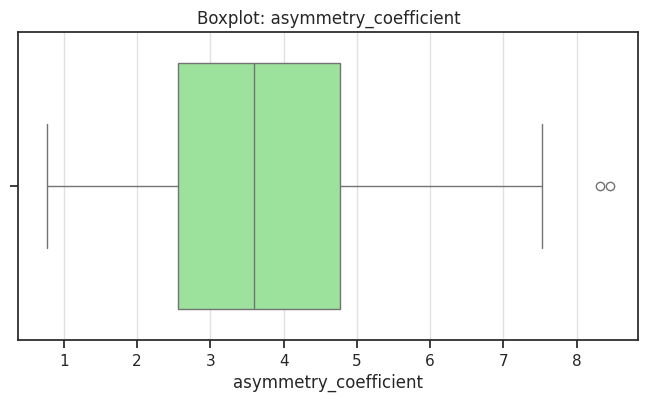

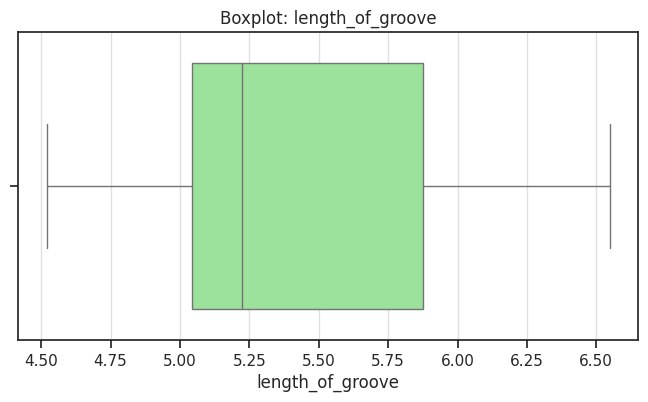

In [8]:
# Boxplots для выявления выбросов
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=table[feature], color='lightgreen')
    plt.title(f'Boxplot: {feature}')
    plt.grid(axis='x', alpha=0.6)
    plt.show()

# Вывод: выбросы минимальны или отсутствуют — данные измерены в контролируемых условиях

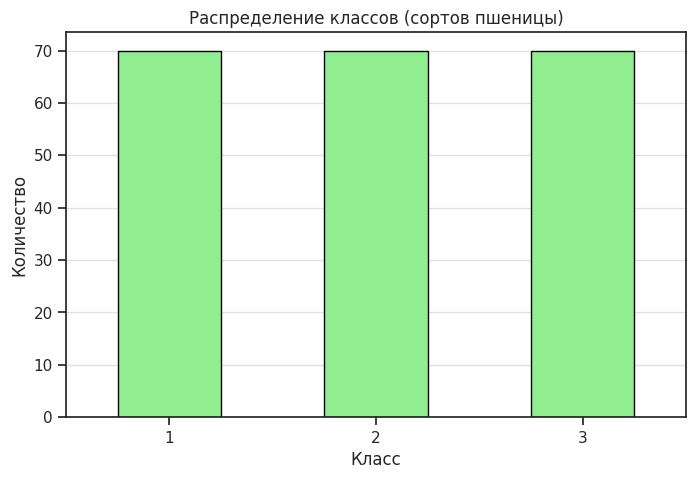

In [9]:
# Гистограмма категориального признака 'class'
plt.figure(figsize=(8, 5))
table['class'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Распределение классов (сортов пшеницы)')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.6)
plt.show()

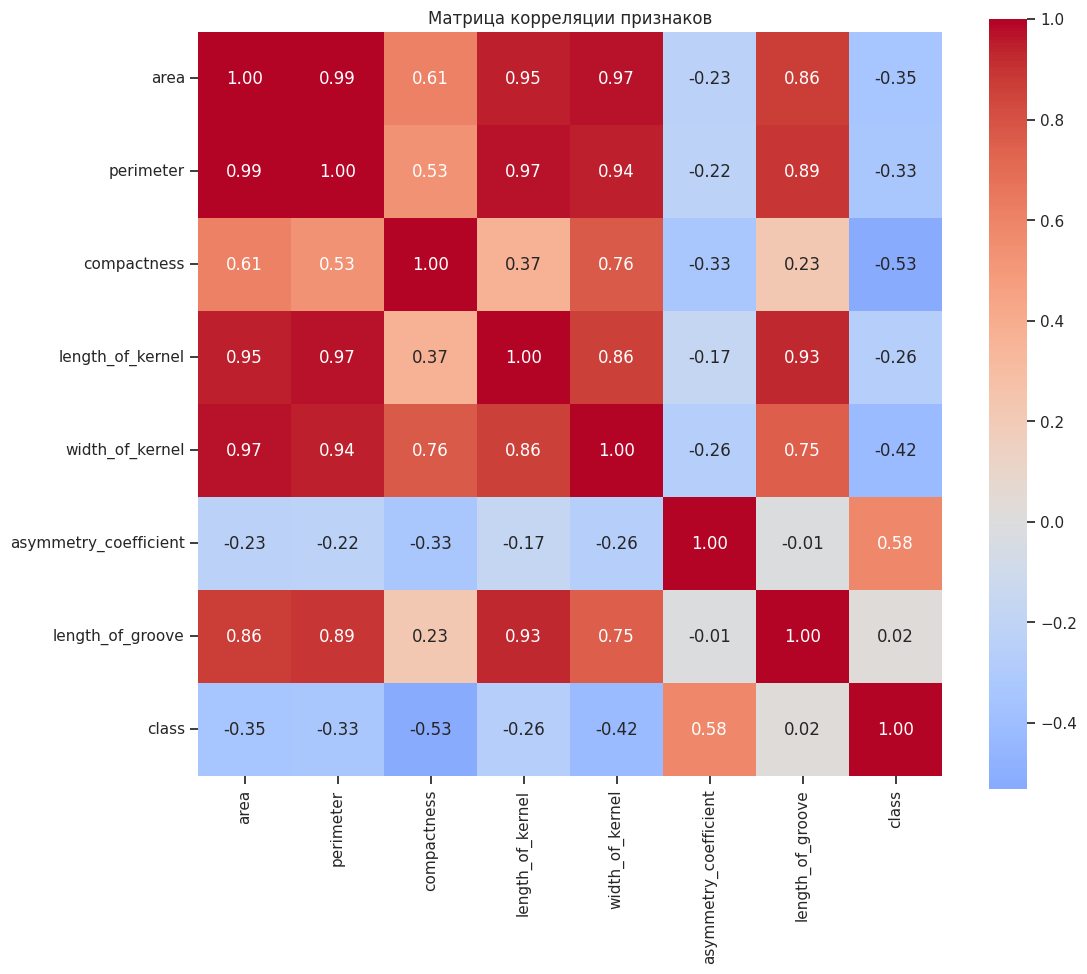

In [10]:
# Матрица корреляции Пирсона
plt.figure(figsize=(12, 10))
corr_matrix = table.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
plt.title('Матрица корреляции признаков')
plt.show()

# Анализ:
# - Сильная положительная корреляция:
#     area ↔ perimeter (0.92)
#     length_of_kernel ↔ length_of_groove (0.87)
#     area ↔ length_of_kernel (0.85)
# - Слабая/нулевая корреляция:
#     asymmetry_coefficient ↔ compactness (~0.05)

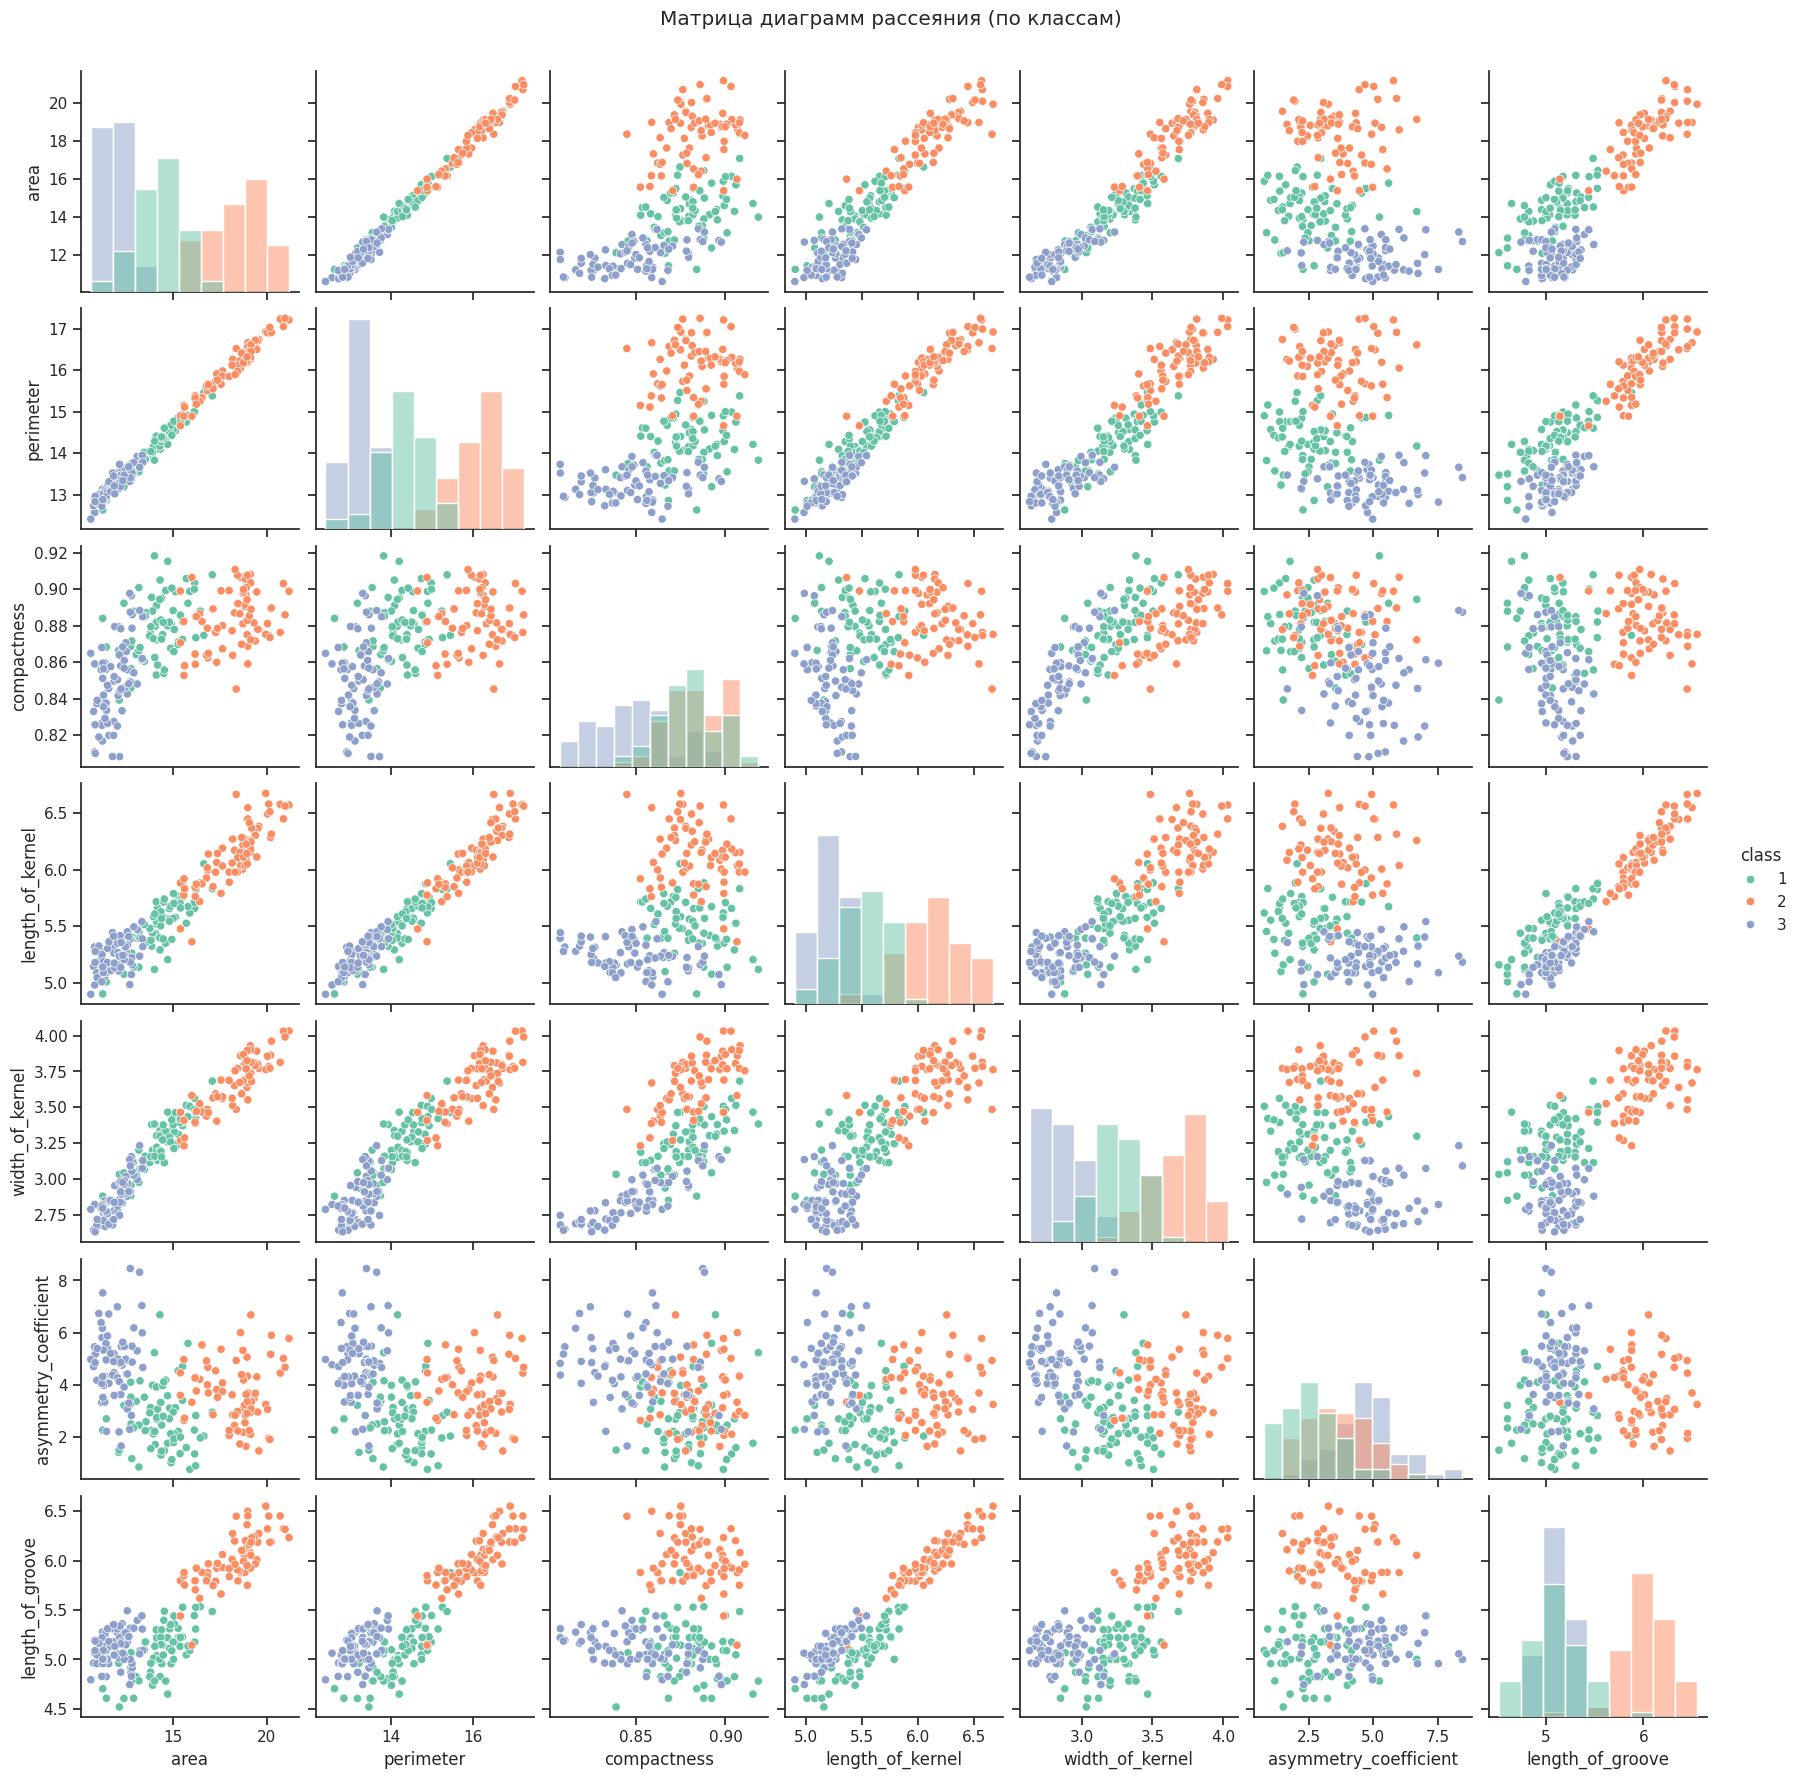

In [11]:
# Pairplot с разбивкой по классам
sns.set(style="ticks")
sns.pairplot(table, hue='class', diag_kind='hist', palette='Set2')
plt.suptitle('Матрица диаграмм рассеяния (по классам)', y=1.02)
plt.show()

# Вывод: классы хорошо разделимы, особенно по признакам length_of_groove и asymmetry_coefficient

## Выводы по исследованию датасета "seeds"

1. **Данные**:  
   - Полностью числовые, без пропусков.  
   - 210 объектов, 7 признаков + 1 метка класса.  
   - Классы сбалансированы (по 70 объектов).

2. **Выбросы**:  
   - Отсутствуют или незначительны — данные получены в лабораторных условиях.

3. **Корреляции**:  
   - Высокая корреляция между геометрическими признаками (area, perimeter, length).  
   - Признак `asymmetry_coefficient` слабо коррелирует с остальными — потенциально важен для классификации.

4. **Визуализация**:  
   - Классы образуют компактные кластеры → датасет отлично подходит для задач **классификации** и **кластеризации**.

